In [706]:
import pandas as pd

In [707]:
data = pd.read_csv("../dataset/correct_full.csv")

In [708]:
data.head(10)

,Дата,Группа,№ Группы,№ Объявления,Тип площадки,Формат,Размер изображения,Тип устройства,Пол,Категория таргетинга,...,Клики,CTR (%),wCTR (%),Расход (руб.),Конверсия (%)/Товар добавлен в корзину,Конверсия (%)/Заказ оформлен,Конверсия (%)/Лид с Centra Market//Динамика,Конверсии/Товар добавлен в корзину,Конверсии/Заказ оформлен,Конверсии/Лид с Centra Market//Динамика
0,15.06.2023,Велосипед Stinger,4296804875,M-9591380676,поиск,текстовый,без изображения,мобильные,не определен,Целевые запросы,...,0,0.0,0.00,0.00,-,-,-,-,-,-
1,15.06.2023,Велосипед Stinger,4296804875,M-9591380678,поиск,графический,с изображением,десктоп,мужской,Запросы с упоминанием конкурентов,...,0,0.0,0.00,0.00,-,-,-,-,-,-
2,15.06.2023,Велосипед Женский,4296804877,M-9591380694,поиск,графический,с изображением,десктоп,женский,Целевые запросы,...,0,0.0,0.00,0.00,-,-,-,-,-,-
3,15.06.2023,Велосипед Женский,4296804877,M-9591380696,поиск,графический,с изображением,десктоп,женский,Целевые запросы,...,0,0.0,0.00,0.00,-,-,-,-,-,-
4,15.06.2023,Велосипед Складной,4296804880,M-9591380710,поиск,текстовый,без изображения,мобильные,мужской,Целевые запросы,...,0,0.0,0.00,0.00,-,-,-,-,-,-
5,15.06.2023,Велосипед Детский,4296804882,M-9591380722,поиск,текстовый,без изображения,мобильные,женский,Целевые запросы,...,1,100.0,150.17,26.02,-,-,-,-,-,-
6,15.06.2023,Велосипед Детский,4296804882,M-9591380722,поиск,текстовый,без изображения,мобильные,женский,Целевые запросы,...,0,0.0,0.00,0.00,-,-,-,-,-,-
7,15.06.2023,Велосипед Детский,4296804882,M-9591380722,поиск,текстовый,без изображения,мобильные,женский,Целевые запросы,...,1,100.0,146.31,18.21,-,-,-,-,-,-
8,15.06.2023,Велосипед Детский,4296804882,M-9591380724,поиск,графический,с изображением,десктоп,мужской,Целевые запросы,...,1,100.0,97.10,41.47,-,-,-,-,-,-
9,15.06.2023,Велосипед Детский,4296804882,M-9591380724,поиск,графический,с изображением,десктоп,женский,Целевые запросы,...,1,100.0,138.12,15.49,-,-,-,-,-,-


### Чистка данных

In [709]:
import numpy as np

# Заменяем странные значения на NaN
strange_values = ["-", "—", "None", "nan", "NaN", ""]
df_new_processed = data.replace(strange_values, np.nan)

# Убираем колонки с пропусками и константные колонки
df_cleaned = df_new_processed.dropna(axis=1)

df_cleaned = df_cleaned.loc[:, (df_cleaned != df_cleaned.iloc[0]).any()]


numerical_cols_processed = df_cleaned.select_dtypes(include=['number']).columns.tolist()
categorical_cols_processed = df_cleaned.select_dtypes(exclude=['number']).columns.tolist()



In [710]:
df_cleaned

,Дата,Группа,№ Группы,№ Объявления,Формат,Размер изображения,Тип устройства,Пол,Категория таргетинга,Упоминание брендов,Уровень платежеспособности,Возраст,Заголовок,Текст,Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.)
0,15.06.2023,Велосипед Stinger,4296804875,M-9591380676,текстовый,без изображения,мобильные,не определен,Целевые запросы,не определено,Остальные,не определен,Магазин велосипедов Stinger,Велосипеды Stinger в Иркутске и обл. От 11 450...,1,1.00,0,0.0,0.00,0.00
1,15.06.2023,Велосипед Stinger,4296804875,M-9591380678,графический,с изображением,десктоп,мужской,Запросы с упоминанием конкурентов,не определено,Остальные,35-44,{PHRASEКупить велосипед Stinger},Велосипеды Stinger в Иркутске и обл. От 11 450...,1,0.81,0,0.0,0.00,0.00
2,15.06.2023,Велосипед Женский,4296804877,M-9591380694,графический,с изображением,десктоп,женский,Целевые запросы,не определено,Остальные,25-34,{PHRASEКупить женский велосипед},Женские велосипеды в Иркутске. Доставка. От 92...,1,0.09,0,0.0,0.00,0.00
3,15.06.2023,Велосипед Женский,4296804877,M-9591380696,графический,с изображением,десктоп,женский,Целевые запросы,не определено,Остальные,25-34,Купить женский велосипед,Женские велосипеды в Иркутске. Доставка. От 92...,1,0.09,0,0.0,0.00,0.00
4,15.06.2023,Велосипед Складной,4296804880,M-9591380710,текстовый,без изображения,мобильные,мужской,Целевые запросы,не определено,Остальные,младше 18,Магазин складных велосипедов,Centra Market- Большой выбор складных велосипе...,1,0.70,0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,14.06.2024,Веломагазин,4296804905,M-9591380874,текстовый,без изображения,мобильные,мужской,Альтернативные запросы,С упоминанием брендов конкурентов,Остальные,35-44,{PHRASEВеломагазин в Иркутске},Велосипеды в Иркутске. Для взрослых и детей. Б...,1,0.09,0,0.0,0.00,0.00
9919,14.06.2024,Веломагазин,4296804905,M-9591380874,текстовый,без изображения,мобильные,мужской,Узкие запросы,Без упоминания вашего бренда,Остальные,35-44,{PHRASEВеломагазин в Иркутске},Велосипеды в Иркутске. Для взрослых и детей. Б...,1,0.67,0,0.0,0.00,0.00
9920,14.06.2024,Веломагазин,4296804905,M-9591380876,графический,с изображением,десктоп,женский,Целевые запросы,Без упоминания вашего бренда,Остальные,35-44,Купить велосипед в Иркутске,Велосипеды для взрослых и детей. 340 моделей. ...,1,0.93,1,100.0,107.02,32.42
9921,14.06.2024,Веломагазин,4296804905,M-9591380876,текстовый,без изображения,мобильные,женский,Целевые запросы,С упоминанием брендов конкурентов,Остальные,35-44,Купить велосипед в Иркутске,Велосипеды для взрослых и детей. 340 моделей. ...,1,0.09,0,0.0,0.00,0.00


### Выбираем целевую метрику

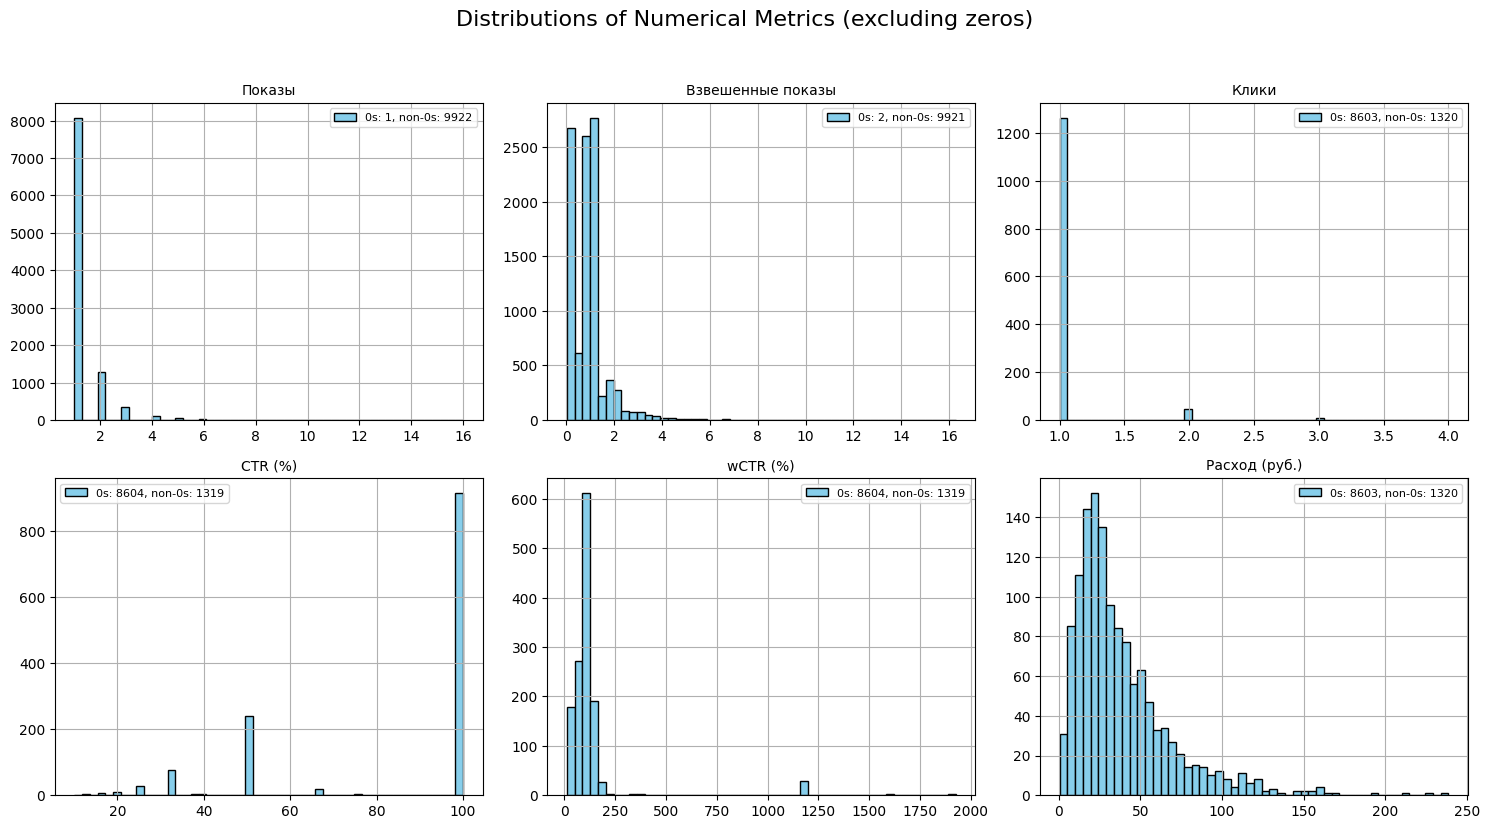

In [711]:
import matplotlib.pyplot as plt

num_df = df_cleaned[numerical_cols_processed[1:]]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(num_df.columns):
    series = num_df[col].dropna()
    zeros_count = (series == 0).sum()
    nonzeros = series[series != 0]
    nonzeros_count = len(nonzeros)

    if len(nonzeros) > 0:
        axes[i].hist(nonzeros, bins=50, color="skyblue", edgecolor="black")
    axes[i].set_title(f"{col}", fontsize=10)
    axes[i].legend([f"0s: {zeros_count}, non-0s: {nonzeros_count}"], fontsize=8)
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distributions of Numerical Metrics (excluding zeros)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Что и зачем мы моделируем в рекламных данных

#### 1. Расходы 

Расход — это базовая метрика рекламной кампании, отражающая затраты.
В простейшем виде его можно описать через модель закупки:

* при оплате за клики (**CPC**):

$$
\text{Расход} = \text{Клики} \times \text{CPC}
$$

* при оплате за показы (**CPM**):

$$
\text{Расход} = \frac{\text{Показы}}{1000} \times \text{CPM}
$$

👉 На практике точная формула сложнее, потому что цены зависят от аукциона и конкуренции, но **приблизить расходы мы можем**.
Моделирование расходов нужно для **прогноза бюджета**: сколько денег уйдёт при выбранных настройках кампании.


#### 2. Показы

Показы отражают охват аудитории.
Они связаны с расходами через модель закупки.
Например, при CPM:

$$
\text{Показы} \approx \frac{\text{Расход}}{\text{CPM}} \times 1000
$$

👉 Моделирование показов позволяет ответить на вопрос:
*«Сколько людей увидят рекламу при заданном бюджете?»*


#### 3. Клики 

Клики — индикатор вовлечённости.
Они напрямую зависят от показов через CTR:

$$
\text{Клики} = \text{Показы} \times \frac{\text{CTR}}{100}
$$

👉 Моделирование кликов помогает понять:
*«Сколько пользователей заинтересуется рекламой?»*


#### 4. Взаимосвязь

Мы можем построить **цепочку зависимостей**:

$$
\text{Расход} \;\; \Rightarrow \;\; \text{Показы} \;\; \Rightarrow \;\; \text{Клики}
$$

* Сначала прогнозируем **расходы** (сколько денег уйдёт).
* Из расходов получаем **показы** (какой будет охват).
* Из показов и CTR получаем **клики** (какая будет вовлечённость).



#### 🎯 Итог

Мы будем моделировать:

* **Расходы** — чтобы прогнозировать бюджет.
* **Показы** — чтобы оценить охват.
* **Клики** — чтобы предсказать вовлечённость.

Это важно, потому что в реальной работе рекламщика главный вопрос звучит так:

👉 *«Сколько нужно потратить, чтобы получить X показов или Y кликов?»*



#### Что такое $R^2$ (коэффициент детерминации)

Формула в простом виде:

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

где

* $SS_{res}$ — сумма квадратов ошибок модели,
* $SS_{tot}$ — сумма квадратов отклонений от среднего.


#### 🔹 Интерпретация

* $R^2 = 1$ → модель идеально предсказывает данные.
* $R^2 = 0$ → модель не лучше, чем просто предсказывать среднее значение.
* $R^2 < 0$ → модель хуже, чем «тривиальное среднее».



## 🔹 Значит:

* **Чем ближе $R^2$ к 1 → тем лучше модель.**
* Сравнивая разные модели, **выбираем ту, у которой $R^2$ больше**, а не меньше.

In [712]:
categorical_cols_processed

['Дата',
 'Группа',
 '№ Объявления',
 'Формат',
 'Размер изображения',
 'Тип устройства',
 'Пол',
 'Категория таргетинга',
 'Упоминание брендов',
 'Уровень платежеспособности',
 'Возраст',
 'Заголовок',
 'Текст']

In [713]:
df_new_processed

,Дата,Группа,№ Группы,№ Объявления,Тип площадки,Формат,Размер изображения,Тип устройства,Пол,Категория таргетинга,...,Клики,CTR (%),wCTR (%),Расход (руб.),Конверсия (%)/Товар добавлен в корзину,Конверсия (%)/Заказ оформлен,Конверсия (%)/Лид с Centra Market//Динамика,Конверсии/Товар добавлен в корзину,Конверсии/Заказ оформлен,Конверсии/Лид с Centra Market//Динамика
0,15.06.2023,Велосипед Stinger,4296804875,M-9591380676,поиск,текстовый,без изображения,мобильные,не определен,Целевые запросы,...,0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,15.06.2023,Велосипед Stinger,4296804875,M-9591380678,поиск,графический,с изображением,десктоп,мужской,Запросы с упоминанием конкурентов,...,0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
2,15.06.2023,Велосипед Женский,4296804877,M-9591380694,поиск,графический,с изображением,десктоп,женский,Целевые запросы,...,0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
3,15.06.2023,Велосипед Женский,4296804877,M-9591380696,поиск,графический,с изображением,десктоп,женский,Целевые запросы,...,0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
4,15.06.2023,Велосипед Складной,4296804880,M-9591380710,поиск,текстовый,без изображения,мобильные,мужской,Целевые запросы,...,0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9918,14.06.2024,Веломагазин,4296804905,M-9591380874,поиск,текстовый,без изображения,мобильные,мужской,Альтернативные запросы,...,0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
9919,14.06.2024,Веломагазин,4296804905,M-9591380874,поиск,текстовый,без изображения,мобильные,мужской,Узкие запросы,...,0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
9920,14.06.2024,Веломагазин,4296804905,M-9591380876,поиск,графический,с изображением,десктоп,женский,Целевые запросы,...,1,100.0,107.02,32.42,NaN,NaN,NaN,NaN,NaN,NaN
9921,14.06.2024,Веломагазин,4296804905,M-9591380876,поиск,текстовый,без изображения,мобильные,женский,Целевые запросы,...,0,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [715]:
from sklearn.preprocessing import OneHotEncoder

# Преобразуем категориальные признаки в числовые с помощью One-Hot Encoding
categorical_cols = categorical_cols_processed[1:]

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_array = encoder.fit_transform(df_new_processed[categorical_cols])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Combine with numerical columns (excluding target 'Показы')
X = encoded_df
# Показы , Расход (руб.)
y = df_new_processed["Расход (руб.)"]

X.shape, y.shape



((9923, 239), (9923,))

In [716]:
 # Моделируем только те строки, где целевая переменная больше нуля
X = X[y>0]
y = y[y>0]

### Предсказываем показы

In [717]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Базовая модель линейной регрессии
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


baseline = LinearRegression()
baseline.fit(X_train, y_train)


y_pred_baseline = baseline.predict(X_test)

mse = mean_squared_error(y_test, y_pred_baseline)
r2 = r2_score(y_test, y_pred_baseline)

mse, r2


(726.6466264381846, 0.03720427306669438)

In [718]:
results = dict()
results['Baseline'] = {'MSE': mse, 'R2': r2}

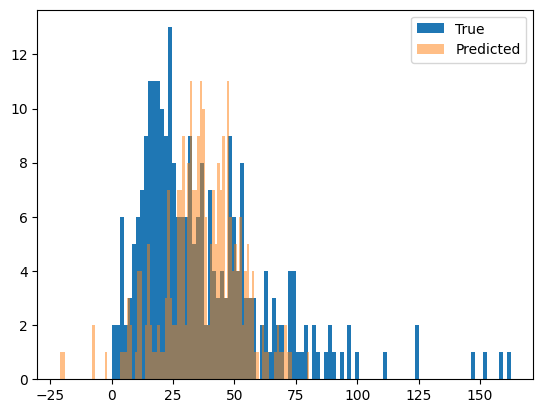

In [719]:
plt.hist(y_test, label='True', bins=100)
plt.hist(y_pred_baseline, alpha=0.5, label='Predicted', bins=100)
plt.legend()

### Пробуем масштабирования и нормализацию

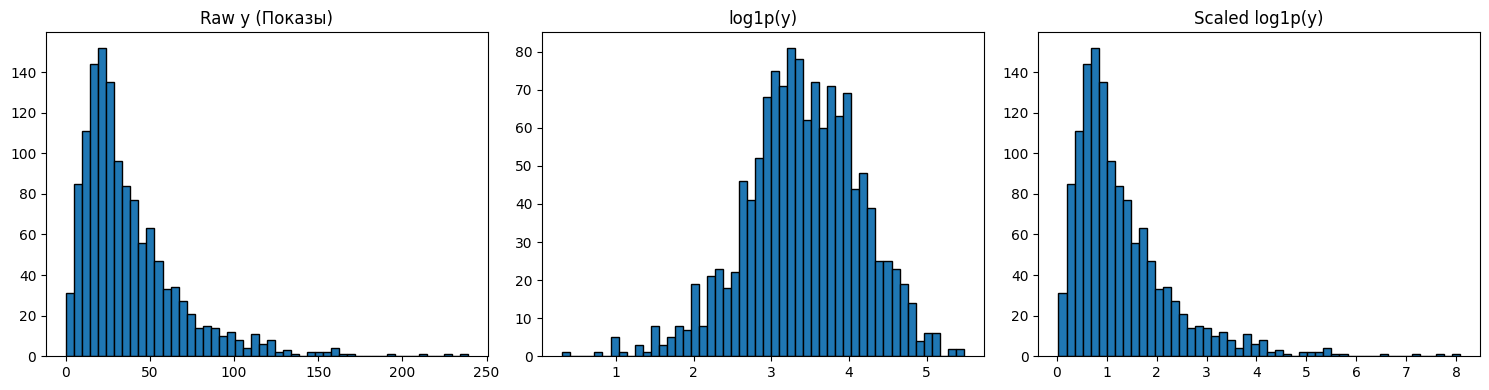

In [720]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 1. Сырые y
y_raw = y.values.reshape(-1, 1)

# 2. Лог-трансформация
y_log = np.log1p(y_raw)

# 3. Стандартизация после лога
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y_raw)

y_scaled += 1.3
# 4. Визуализация
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(y_raw, bins=50, edgecolor="black")
plt.title("Raw y (Показы)")

plt.subplot(1, 3, 2)
plt.hist(y_log, bins=50, edgecolor="black")
plt.title("log1p(y)")

plt.subplot(1, 3, 3)
plt.hist(y_scaled, bins=50, edgecolor="black")
plt.title("Scaled log1p(y)")

plt.tight_layout()
plt.show()


In [721]:

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)


log_target_model = LinearRegression()
log_target_model.fit(X_train, y_train)
y_pred_log = log_target_model.predict(X_test)


print("Predict on log scale")
mse = mean_squared_error(y_test, y_pred_log)
r2 = r2_score(y_test, y_pred_log)

print("MSE:", mse)
print("R²:", r2)

print()
print("Predict on original scale")
y_inverse = np.expm1(y_test)  
y_pred_inverse = np.expm1(y_pred_log) 


mse = mean_squared_error(y_inverse, y_pred_inverse)
r2 = r2_score(y_inverse, y_pred_inverse)

print("MSE:", mse)
print("R²:", r2)

results['Log-Target'] = {'MSE': mse, 'R2': r2}

Predict on log scale
MSE: 0.4830528324563554
R²: 0.10978042191882098

Predict on original scale
MSE: 726.6647175341859
R²: 0.03718030263967853


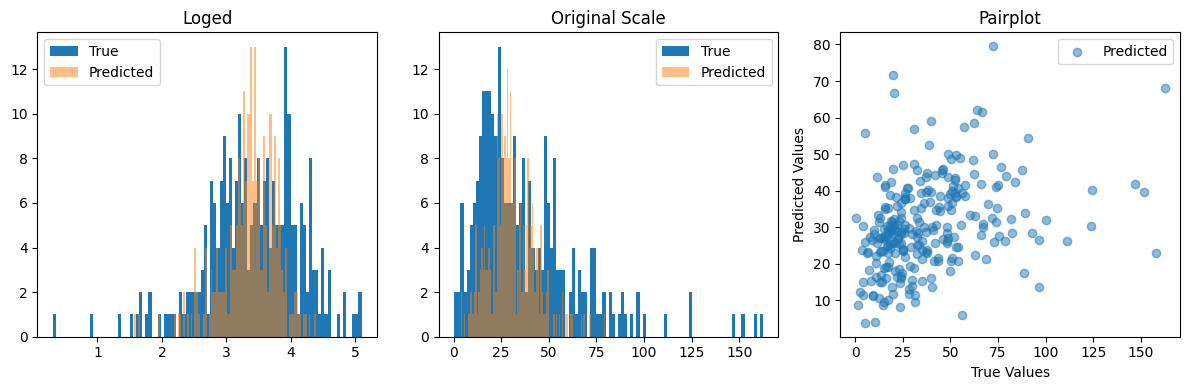

In [722]:
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
plt.hist(y_test, label='True', bins=100)
plt.hist(y_pred_log, alpha=0.5, label='Predicted', bins=100)
plt.title("Loged")
plt.legend()

plt.subplot(1,3,2)
plt.hist(y_inverse, label='True', bins=100)
plt.hist(y_pred_inverse, alpha=0.5, label='Predicted', bins=100)
plt.title("Original Scale")
plt.legend()

plt.subplot(1,3,3)
plt.scatter(y_inverse,y_pred_inverse, alpha=0.5, label='Predicted')
plt.title("Pairplot")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()

plt.tight_layout()



In [723]:
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)


scaled_target_model = LinearRegression()
scaled_target_model.fit(X_train, y_train)


y_pred_scaled = scaled_target_model.predict(X_test)

inv_scale_y_pred = scaler.inverse_transform(y_pred_scaled)
inv_scale_y_test = scaler.inverse_transform(y_test)

print("Predict on log scale")
mse = mean_squared_error(inv_scale_y_test, inv_scale_y_pred)
r2 = r2_score(inv_scale_y_test, inv_scale_y_pred)

print("MSE:", mse)
print("R²:", r2)

results['Scaled-Target'] = {'MSE': mse, 'R2': r2}


Predict on log scale
MSE: 726.6466264381847
R²: 0.03720427306669416


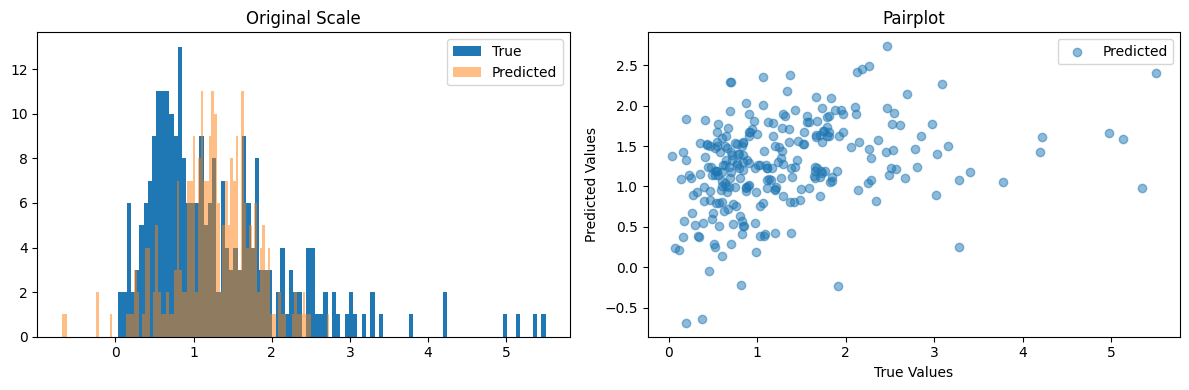

In [724]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.hist(y_test, label='True', bins=100)
plt.hist(y_pred_scaled, alpha=0.5, label='Predicted', bins=100)
plt.title("Original Scale")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred_scaled, alpha=0.5, label='Predicted')
plt.title("Pairplot")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()

plt.tight_layout()


In [725]:
from sklearn.preprocessing import PowerTransformer


pt = PowerTransformer(method='yeo-johnson')
y_trans = pt.fit_transform(y.values.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_norm_log = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_norm_log)
r2 = r2_score(y_test, y_pred_norm_log)

print("Predict on normalized log scale")
print("MSE:", mse)
print("R²:", r2)

print()
print("Predict on original scale")
y_test_inv = pt.inverse_transform(y_test)
y_pred_test_inv = pt.inverse_transform(y_pred_norm_log)

mse = mean_squared_error(y_test_inv, y_pred_test_inv)
r2 = r2_score(y_test_inv, y_pred_test_inv)

print("MSE:", mse)
print("R²:", r2)

results['Normalized-Target'] = {'MSE': mse, 'R2': r2}


Predict on normalized log scale
MSE: 0.860857850224296
R²: 0.10614182472188771

Predict on original scale
MSE: 716.1894217851573
R²: 0.05105991016632927


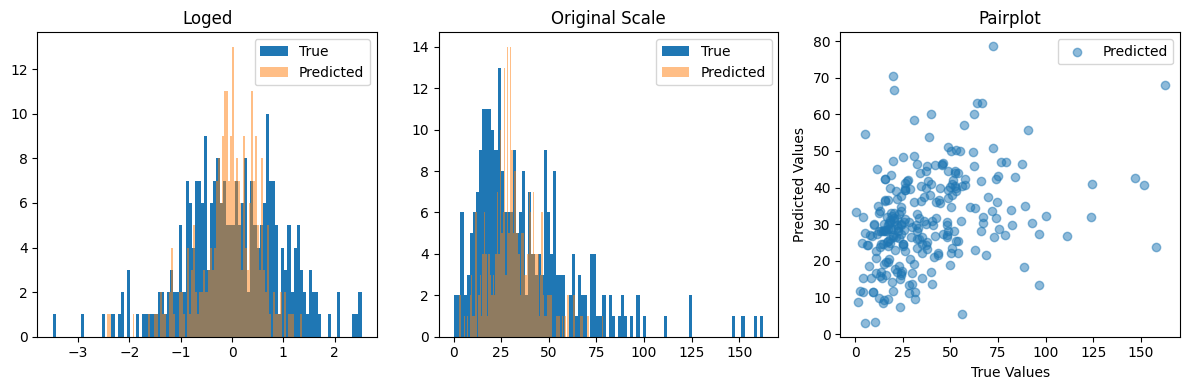

In [726]:
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
plt.hist(y_test, label='True', bins=100)
plt.hist(y_pred_norm_log, alpha=0.5, label='Predicted', bins=100)
plt.title("Loged")
plt.legend()

plt.subplot(1,3,2)
plt.hist(y_test_inv, label='True', bins=100)
plt.hist(y_pred_test_inv, alpha=0.5, label='Predicted', bins=100)
plt.title("Original Scale")
plt.legend()

plt.subplot(1,3,3)
plt.scatter(y_test_inv,y_pred_test_inv, alpha=0.5, label='Predicted')
plt.title("Pairplot")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()

plt.tight_layout()


In [727]:
from sklearn.linear_model import PoissonRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Пуассон (лог-связь)
poisson = PoissonRegressor(alpha=0.01, max_iter=1000)
poisson.fit(X_train, y_train)

#print("Poisson R²:", poisson.score(X_test, y_test))

y_pred = poisson.predict(X_test)


inv_scale_y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
inv_scale_y_test = scaler.inverse_transform(y_test)

mse = mean_squared_error(inv_scale_y_test, inv_scale_y_pred)
r2 = r2_score(inv_scale_y_test, inv_scale_y_pred)

print("Poisson prediction")
print("MSE:", mse)
print("R²:", r2)

results['Poisson'] = {'MSE': mse, 'R2': r2}

Poisson prediction
MSE: 670.9836088266547
R²: 0.11095692470603069


/Users/zoya/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


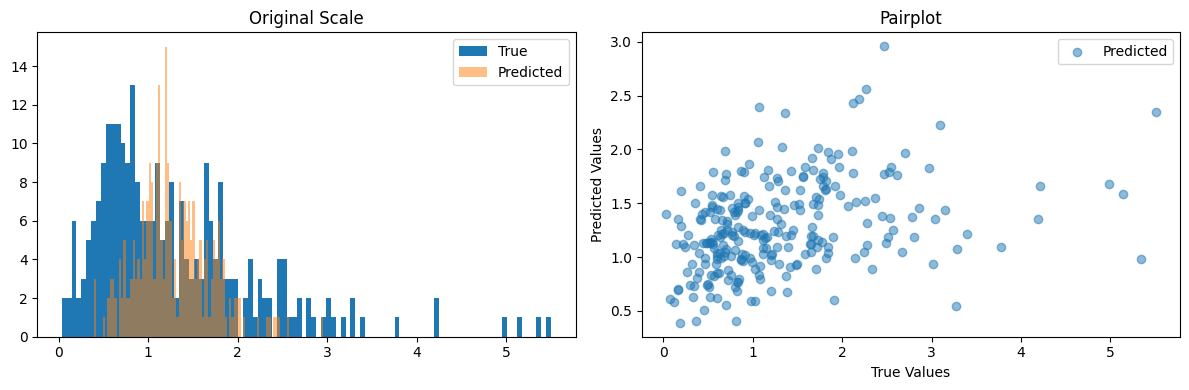

In [728]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.hist(y_test, label='True', bins=100)
plt.hist(y_pred, alpha=0.5, label='Predicted', bins=100)
plt.title("Original Scale")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred, alpha=0.5, label='Predicted')
plt.title("Pairplot")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()

plt.tight_layout()

In [ ]:
import numpy as np
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# важное требование Tweedie: y >= 0
assert (y_scaled >= 0).all(), "Для TweedieRegressor целевая должна быть ≥ 0"

X_train, X_test, y_train, y_test = train_test_split(
    X, y_scaled, test_size=0.2, random_state=42
)

pipe_tweedie = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),
    ("tw", TweedieRegressor(max_iter=2000))
])

param_grid = {
    "tw__power":  np.linspace(1.1, 1.9, 9),  # 1→Poisson, 2→Gamma; между ними — «с нулями + хвост»
    "tw__alpha":  [0.0, 0.001, 0.01, 0.1, 1.0],  # L2-регуляризация
    "tw__link":   ["log"]  # стандартная связь
}

gs = GridSearchCV(
    pipe_tweedie,
    param_grid,
    scoring="neg_mean_squared_error",  # основной скоринг
    cv=5,
    n_jobs=-1
)
gs.fit(X_train, y_train)

best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

inv_scale_y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
inv_scale_y_test = scaler.inverse_transform(y_test)

mse = mean_squared_error(inv_scale_y_test, inv_scale_y_pred)
r2 = r2_score(inv_scale_y_test, inv_scale_y_pred)   

print("Tweedie best params:", gs.best_params_)
print("Tweedie  MSE:", mean_squared_error(inv_scale_y_test, inv_scale_y_pred))
print("Tweedie  R² :", r2_score(inv_scale_y_test, inv_scale_y_pred))

results['Tweedie'] = {'MSE':   mse, 'R2': r2}

/Users/zoya/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zoya/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zoya/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zoya/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was e

Tweedie best params: {'tw__alpha': 1.0, 'tw__link': 'log', 'tw__power': 1.9}
Tweedie  MSE: 670.4344499181067
Tweedie  R² : 0.11168455190654358


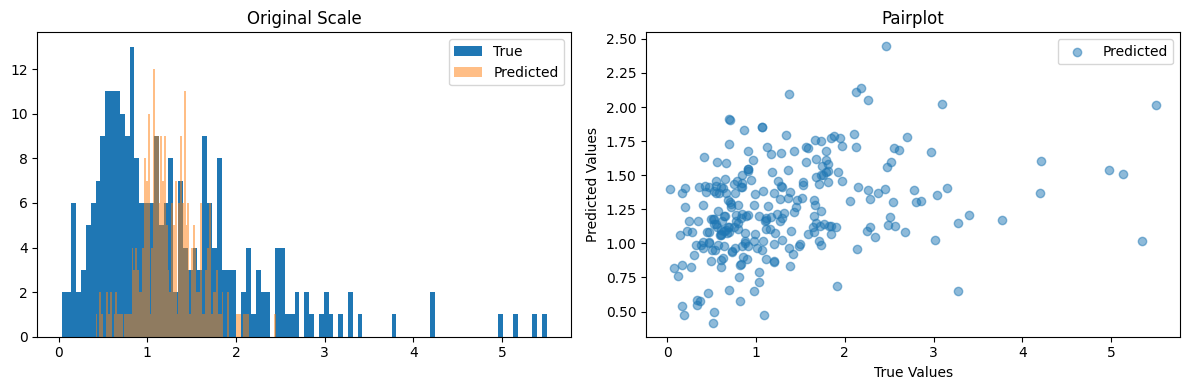

In [730]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.hist(y_test, label='True', bins=100)
plt.hist(y_pred, alpha=0.5, label='Predicted', bins=100)
plt.title("Original Scale")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted')
plt.title("Pairplot")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()

plt.tight_layout()

In [731]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PoissonRegressor


X_train, X_test, y_train, y_test = train_test_split(
    X, y_scaled, test_size=0.2, random_state=42
)

pipe = Pipeline([
    ("svd", TruncatedSVD(n_components=90, random_state=42)),  # сжать до 100 компонент
    ("poisson", PoissonRegressor(alpha=0.01, max_iter=1000))
])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

inv_scale_y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
inv_scale_y_test = scaler.inverse_transform(y_test)

mse = mean_squared_error(inv_scale_y_test, inv_scale_y_pred)
r2 = r2_score(inv_scale_y_test, inv_scale_y_pred)

print("Tweedie  MSE:", mean_squared_error(inv_scale_y_test, inv_scale_y_pred))
print("Tweedie  R² :", r2_score(inv_scale_y_test, inv_scale_y_pred))

results['SVD-Poisson'] = {'MSE': mse, 'R2': r2}

Tweedie  MSE: 670.9836088252304
Tweedie  R² : 0.11095692470791785


/Users/zoya/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


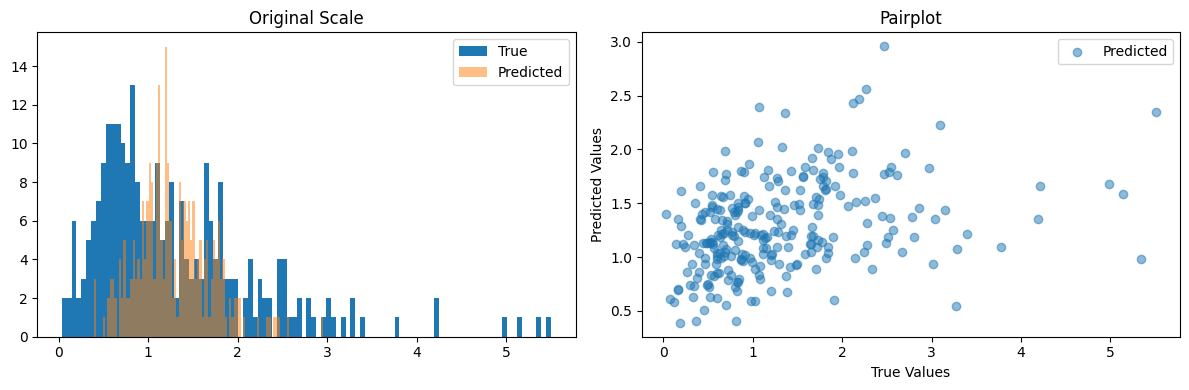

In [732]:
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.hist(y_test, label='True', bins=100)
plt.hist(y_pred, alpha=0.5, label='Predicted', bins=100)
plt.title("Original Scale")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test,y_pred, alpha=0.5, label='Predicted')
plt.title("Pairplot")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()

plt.tight_layout()

In [733]:

df = pd.DataFrame(results).T  # .T транспонирует, чтобы модели были строками
df.round(4)

,MSE,R2
Baseline,726.6466,0.0372
Log-Target,726.6647,0.0372
Scaled-Target,726.6466,0.0372
Normalized-Target,716.1894,0.0511
Poisson,670.9836,0.1110
Tweedie,670.4344,0.1117
SVD-Poisson,670.9836,0.1110


### Моделируем взвешенные показы, но методологически правильно

In [ ]:
results = dict()

In [832]:
from sklearn.preprocessing import OneHotEncoder

# Преобразуем категориальные признаки в числовые с помощью One-Hot Encoding
categorical_cols = categorical_cols_processed[1:]
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded_array = encoder.fit_transform(df_new_processed[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

X = encoded_df
y = df_new_processed["Взвешенные показы"]
mask = y > 0
X.shape, y.shape


((9923, 239), (9923,))

In [833]:
# Разбиение на train/test
train_idx, test_idx = train_test_split(np.arange(len(y[mask])), test_size=0.2, random_state=42)

# Обучающая выборка
X_train = X.values[mask][train_idx]
y_train = y.values[mask][train_idx]

# Тестовая выборка
X_test = X.values[mask][test_idx]
y_test = y.values[mask][test_idx]




In [834]:
from sklearn.preprocessing import MinMaxScaler
# Масштабирование целевой переменной
scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1)).ravel()

# Обучение модели
poisson = PoissonRegressor(alpha=0.01, max_iter=1000)
poisson.fit(X_train, y_train_scaled)

# Предсказание и обратное преобразование
y_pred_scaled = poisson.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Метрики
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE", mse)
print("R²", r2)

MSE 0.6561391434506735
R² 0.09781092968184357


Text(0.5, 1.0, 'Pairplot')

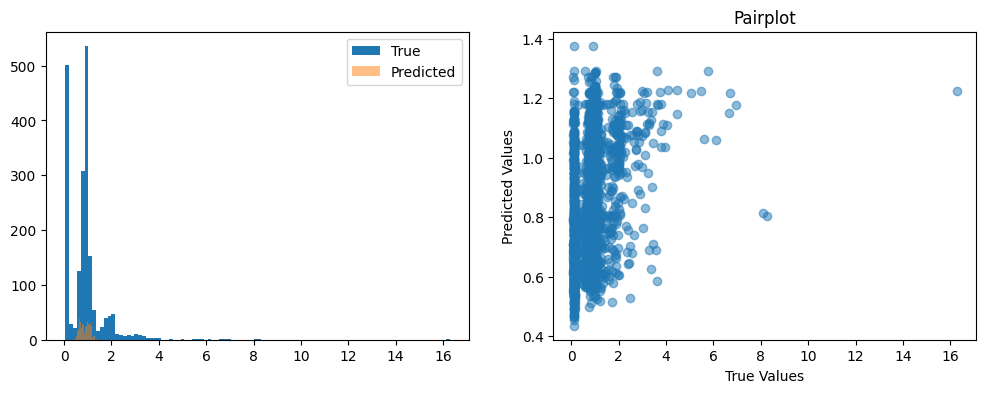

In [835]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(y_test, label='True', bins=100)
plt.hist(y_pred, label='Predicted', bins=100, alpha=0.5)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Pairplot")

In [838]:

pipe_tweedie = Pipeline([
    ("scaler", StandardScaler()),  # масштабируем только X
    ("tw", TweedieRegressor(max_iter=2000))
])

param_grid = {
    "tw__power":  np.linspace(1.1, 1.9, 9),
    "tw__alpha":  [0.0, 0.001, 0.01, 0.1, 1.0],
    "tw__link":   ["log"]
}

gs = GridSearchCV(
    pipe_tweedie,
    param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)
gs.fit(X_train, y_train)

best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tweedie best params:", gs.best_params_)
print("Tweedie  MSE:", mse)
print("Tweedie  R² :", r2)

results['Tweedie'] = {'MSE': mse, 'R2': r2}


Tweedie best params: {'tw__alpha': 0.1, 'tw__link': 'log', 'tw__power': 1.1}
Tweedie  MSE: 0.6380720186578038
Tweedie  R² : 0.12265316426409822


Text(0.5, 1.0, 'Pairplot')

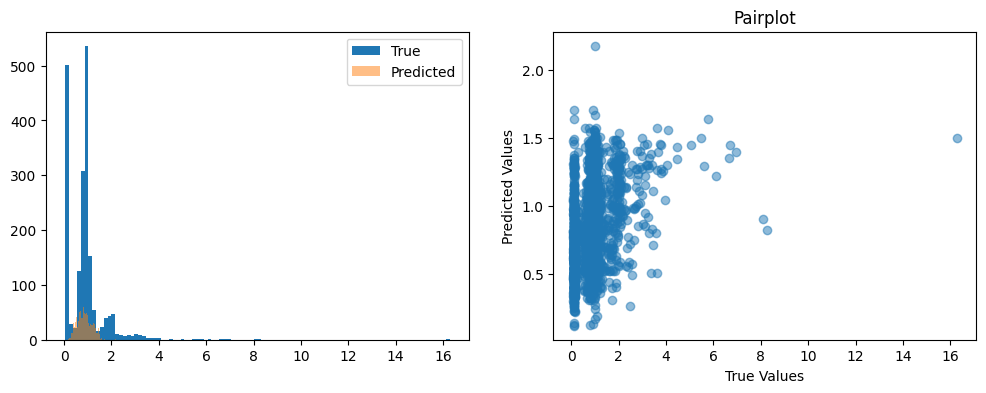

In [839]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(y_test, label='True', bins=100)
plt.hist(y_pred, label='Predicted', bins=100, alpha=0.5)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Pairplot")